In [1]:
# download these files from their original access point at the bottom of 
# the CSCS webpage (https://casch.org/cscs) or the course github and access them locally
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
# "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"
, na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

dataV2 = data[data.REMOVE_case=='No'].copy()

dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
# The data itself then looks like this
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000)

/tmp/ipykernel_244/3536972209.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"


1.
  Recently, social interactions are being highly valued. We can say that friends can make people feel better.
  First, I am going to use the data to determine if friend and the scale of happiness are related.
  The first variable is CONNECTION_social_num_close_friends_grouped. It is categorical variable. We can calcauate the frequency. It is shown below.

In [2]:
freq = dataV2_cohortV3['CONNECTION_social_num_close_friends_grouped'].value_counts().sort_index()
print(freq)

CONNECTION_social_num_close_friends_grouped
1–2          198
3–4          285
5 or more    280
Name: count, dtype: int64


The second variable is WELLNESS_subjective_happiness_scale_score. It is numerical variable. We can calcaute the statistic.	

In [3]:
mean_value = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].mean()
median_value = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].median()
mode_value = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].mode()[0]
variance_value = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].var()
std_dev_value = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].std()
q1 = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].quantile(0.25)
q3 = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score'].quantile(0.75)
print(mean_value)
print(median_value)
print(mode_value)
print(variance_value)
print(std_dev_value)
print(q1)
print(q3)

4.501861042183623
4.75
5.25
2.102015165759904
1.4498328061400405
3.5
5.5


Here is a bar chart.

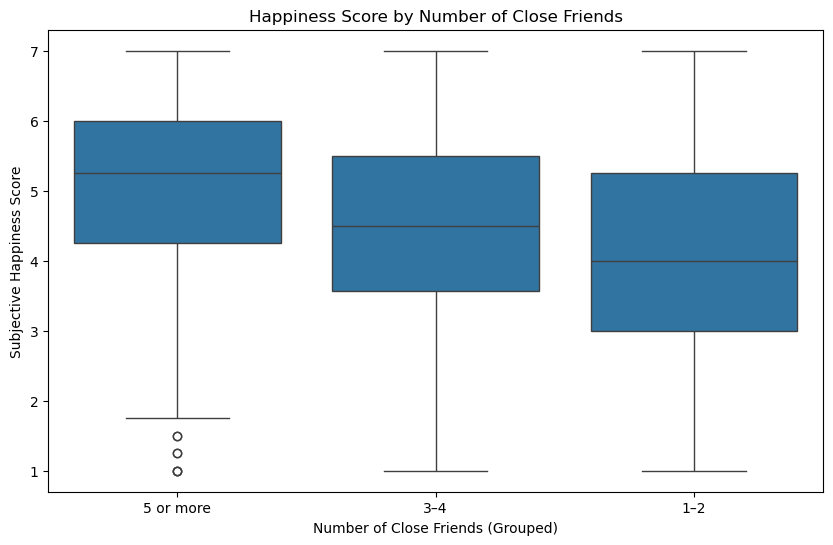

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataV2_cohortV3, x='CONNECTION_social_num_close_friends_grouped', y='WELLNESS_subjective_happiness_scale_score')
plt.xlabel('Number of Close Friends (Grouped)')
plt.ylabel('Subjective Happiness Score')
plt.title('Happiness Score by Number of Close Friends')
plt.show()

Conclusion:  As the bar chart shown above, it shows the median score of people who have 5 or more friends is the highest.I can say more close friends you have, you have higher happiness score. So, making new friends can be considered a good way to handle mental problems. Friends bring joy, laughter, and relaxation, enhancing your overall sense of happiness and making life more enjoyable. Besides Research shows that having friends can reduce the risk of depression and anxiety, positively impacting mental health.

2. 
  Furthermore, I would like to find out whether or not a good mood will affect life satisfaction.
  
  The purpose is to find out the relation and how strong is the relation.
  
  The first variable is WELLNESS_subjective_happiness_scale_score. It describes 'In general, I consider myself how happy am I'. It is a kind of numerical variable. We can calcaute the statistic.

  The second variable is WELLNESS_life_satisfaction. It describes 'On a scale of 1 to 10, How do you feel about your life as a whole right now?' So it is also a numerical variable.


In [5]:
mean_value = dataV2_cohortV3['WELLNESS_life_satisfaction'].mean()
median_value = dataV2_cohortV3['WELLNESS_life_satisfaction'].median()
mode_value = dataV2_cohortV3['WELLNESS_life_satisfaction'].mode()[0]
variance_value = dataV2_cohortV3['WELLNESS_life_satisfaction'].var()
std_dev_value = dataV2_cohortV3['WELLNESS_life_satisfaction'].std()
q1 = dataV2_cohortV3['WELLNESS_life_satisfaction'].quantile(0.25)
q3 = dataV2_cohortV3['WELLNESS_life_satisfaction'].quantile(0.75)
print(mean_value)
print(median_value)
print(mode_value)
print(variance_value)
print(std_dev_value)
print(q1)
print(q3)

6.031980319803198
7.0
7.0
5.787153339513674
2.40565029451782
4.0
8.0


Here is the scatter plot.

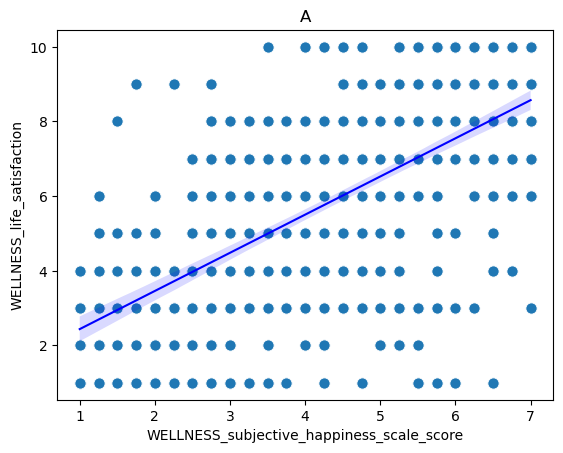

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_score']
Y = dataV2_cohortV3['WELLNESS_life_satisfaction']
sns.scatterplot(x=X, y=Y, s=66)
sns.regplot(x=X, y=Y, scatter=False, color="blue", line_kws={"linewidth":1.5})
plt.title("A")
plt.xlabel("WELLNESS_subjective_happiness_scale_score")
plt.ylabel("WELLNESS_life_satisfaction")
plt.show()

  We can use linear regression to alalyze the relationship between WELLNESS_subjective_happiness_scale_score and WELLNESS_life_satisfaction.Specifically, we aim to determine whether happiness is associated with satisfaction.

In [7]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

community_data = data[['WELLNESS_subjective_happiness_scale_score', 
                       'WELLNESS_life_satisfaction']].dropna()
model = smf.ols('WELLNESS_life_satisfaction~WELLNESS_subjective_happiness_scale_score', data=community_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.288
Model:                                    OLS   Adj. R-squared:                  0.288
Method:                         Least Squares   F-statistic:                     1457.
Date:                        Mon, 04 Nov 2024   Prob (F-statistic):          6.34e-268
Time:                                23:55:22   Log-Likelihood:                -7696.7
No. Observations:                        3599   AIC:                         1.540e+04
Df Residuals:                            3597   BIC:                         1.541e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.4044      0.129     10.928      0.000       1.152       1.656
WELLNESS_subjective_happiness_scale_score     1.0622      0.028     38.168      0.000       1.008       1.117
==============================================================================
Omnibus:                      152.250   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.123
Skew:                          -0.464   Prob(JB):                     6.32e-41
Kurtosis:                       3.612   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

  The coef is +1.0622 which indicates that x increases 1, y increases 1.0622. 
  R-squared is 0.288. THis indicates a moderate ability for independent variable to explain dependent variable. This could mean that other factors may have a greater influence on the dependent variable. 
  P-value for happiness score is 0. It shows very strong evidence to reject the null hypothesis. This means that there is a significant linear relationship between the independent variable (subjective happiness score) and the dependent variable (life satisfaction).

  Conclusion: So the analysis shows a positive and strong relation between 2 variables. Happiness can boost life satisfaction but it isnt the only factor. Other factors like achivement can also affect life satisfaction. Or we do something better to gain happiness and life satisfaction at the same time. This is also reasonable. 

3. I also want to find if people get enough social connection and friends' support during epidemic. People were restricted to stay at home and maintain social distance which seemed to reduce the chance of getting social support. I will use analysis to verify. 
Purpose: Find out the difference between 2021 and 2022 friends' support.

  



In [15]:
dataV2_cohortV4 = dataV2_cohortV3[dataV2_cohortV3.Secs_per_q<30].copy()
dataV2_cohortV4.loc[:, 'SURVEY_YEAR'] = (dataV2_cohortV4.SURVEY_collection_type+" "+dataV2_cohortV4.SURVEY_collection_year.astype(str)).values
# dataV2_cohortV4.SURVEY_YEAR.value_counts()
# SURVEY_YEAR
# cohort 2022    446
# cross 2021     368

# we'll focus on some of the numeric outcomes in the data set... including Secs_per_q
dataV2_cohortV4_wide = \
dataV2_cohortV4.melt(id_vars=['UNIQUE_id','SURVEY_YEAR'], 
                     value_vars=['Secs_per_q',
                                'LONELY_ucla_loneliness_scale_score',
                                'WELLNESS_life_satisfaction', 
                                'WELLNESS_malach_pines_burnout_measure_score',
                                'LONELY_dejong_emotional_social_loneliness_scale_score',
                                'LONELY_dejong_emotional_loneliness_sub_scale_score',
                                'LONELY_dejong_social_loneliness_sub_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_family_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_friends_subscale_score',
                                'WELLNESS_subjective_happiness_scale_score',
                                'WELLNESS_phq_score', 'WELLNESS_gad_score'])
# and we'll put these in columns for "cross 2021" and "cohort 2022"
dataV2_cohortV4_wide['variable'] = dataV2_cohortV4_wide['variable'] + " ("+dataV2_cohortV4_wide['SURVEY_YEAR']+")" 
# on the basis of UNIQUE_id which links individuals across studies
dataV2_cohortV4_wide = dataV2_cohortV4_wide.pivot(index='UNIQUE_id', columns='variable', values='value')
# and consider fully observed data only
dataV2_cohortV4_wideV2 = dataV2_cohortV4_wide.dropna() 

The first variable is PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022). It is a numerical variable.

In [17]:
mean_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].mean()
median_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].median()
mode_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].mode()[0]
variance_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].var()
std_dev_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].std()
q1 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].quantile(0.25)
q3 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].quantile(0.75)
print(mean_value)
print(median_value)
print(mode_value)
print(variance_value)
print(std_dev_value)
print(q1)
print(q3)

5.023851590106007
5.0
4.75
1.4677358218680348
1.21150147415017
4.25
6.0


The second variable is PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021). It is a numerical variable.

In [18]:
mean_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].mean()
median_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].median()
mode_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].mode()[0]
variance_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].var()
std_dev_value = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].std()
q1 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].quantile(0.25)
q3 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].quantile(0.75)
print(mean_value)
print(median_value)
print(mode_value)
print(variance_value)
print(std_dev_value)
print(q1)
print(q3)

4.896643109540636
5.0
5.0
1.7027103225321423
1.304879428350429
4.25
6.0


In [19]:
import numpy as np
bootstrap_samples = 1000
np.random.seed(130)
bootstrapped_statistic= np.zeros(bootstrap_samples)
n1=len(dataV2_cohortV4_wideV2["PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)"])
n2=len(dataV2_cohortV4_wideV2["PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)"])

for i in range(bootstrap_samples):
    simulated_sample1 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022)'].sample(n=n1, replace=True)	
    simulated_sample2 = dataV2_cohortV4_wideV2['PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021)'].sample(n=n2, replace=True)
    bootstrapped_statistic[i] = simulated_sample1.mean()-simulated_sample2.mean()

np.quantile(bootstrapped_statistic,[0.025,0.095])

array([-0.0857553 , -0.01413428])

  Using the bootstrap method to analyze the social support scores in 2021 and 2022 offers a unique advantage because it lets us evaluate differences between the two years without needing strict assumptions about the data’s shape or distribution. Unlike traditional methods that often assume a normal distribution and equal variances, bootstrap resampling relies on creating many "resampled" datasets directly from our data. By repeatedly sampling with replacement, we build a distribution of the differences in mean social support scores. This approach makes the results more flexible and realistic, especially for data that might not follow textbook assumptions.
  
  The outcome of the bootstrap analysis gives us an estimated difference between the years and a confidence interval around that difference. If the confidence interval includes zero, it suggests that any difference between the years is likely due to random chance. However, if zero isn’t in this interval, we have stronger evidence that the difference is real. This approach helps us capture any meaningful changes in social support over time, offering a clearer understanding of whether these changes are significant.

Conclusion: The analysis shows that 2022's data is higher than 2021's data. That indicates during epidemic people do have less friends' support. When time passing, the situation improved.

In general, the pandemic has changed the friend support system, as in-person interactions have been limited due to the restrictive measures and social distancing, which contributed to more isolation and less emotional and expository help from friends. Numerous individuals chose virtual relationships to preserve the friendships, however, these online contacts did not come close to the depth of face-to-face communication. Strong emotional ties are vital for the mood elevation and well-being as they bring consolation, ease stress, and reassure one of being safe. Such strategies are correlated with lower anxiety and higher happiness levels, which is why having close friends becomes crucial to preserve mental health. On top of that, feeling happy is tightly related to life satisfaction; people with joy and a sense of fulfillment generally have better life satisfaction, as these positive feelings lead to more gratification and to a higher notion of life quality.